In [1]:
from strategy import DualReallocationStrategy
import vectorbt as vbt
import dffc

codes = ['007467', '004253']
names=['HL', 'GD']
start_date = '2022-07-01'
end_date = '2025-06-30'

fund_data = dffc.FundData.download(
    codes,
    names=names,
    start=start_date,
    end=end_date
)

price_data = fund_data.get('cumulative_value')


In [4]:
import json
with open("../../fund_config_hlvsgd.json", 'r', encoding='utf-8') as f:
    config_data = json.load(f)

In [7]:
strategy = DualReallocationStrategy(
    prices = price_data,
    adjust_factor=0.2,
    rebalance_freq='D',  # 日度再平衡
    default_weights = [0.5, 0.5],
    up_weights = [0.2, 0.8],
    down_weights= [0.8, 0.2], 
    threshold=0.6,
    optimization=False,  # 先禁用优化避免多进程问题
    hw_params_list = config_data  # 分别为两只基金设置不同的HW参数
)

portfolio, rebalance_mask, actual_weights = strategy.run_backtest(initial_cash=100000, fees = 0.001)


Using external Holt-Winters parameters...
  007467 (007467): alpha=0.0878, beta=0.0579, gamma=0.0910, season=17
  004253 (004253): alpha=0.1110, beta=0.0061, gamma=0.0277, season=14
Generating target weight series...
Preparing backtest data...
Total rebalancing count: 608
Running vectorbt backtest...


In [3]:
price_data


symbol,007467,004253
date,,
2022-07-01 00:00:00+08:00,1.4655,1.4243
2022-07-04 00:00:00+08:00,1.4617,1.4314
2022-07-05 00:00:00+08:00,1.4660,1.4296
2022-07-06 00:00:00+08:00,1.4367,1.4029
2022-07-07 00:00:00+08:00,1.4378,1.3829
...,...,...
2025-06-25 00:00:00+08:00,1.9557,2.7462
2025-06-26 00:00:00+08:00,1.9627,2.7537
2025-06-27 00:00:00+08:00,1.9387,2.7182



=== Rebalancing Strategy Performance Analysis ===
Total Return(%): 72.79
Sharpe Ratio: 1.88
Max Drawdown(%): -8.57

Detailed Statistics:
Start                           2022-07-01 00:00:00+08:00
End                             2025-06-30 00:00:00+08:00
Period                                  729 days 00:00:00
Start Value                                      100000.0
End Value                                   172785.412249
Total Return [%]                                72.785412
Benchmark Return [%]                            61.555596
Max Gross Exposure [%]                              100.0
Total Fees Paid                               5826.568854
Max Drawdown [%]                                  8.56523
Max Drawdown Duration                   131 days 00:00:00
Total Trades                                          609
Total Closed Trades                                   607
Total Open Trades                                       2
Open Trade PnL                                1587

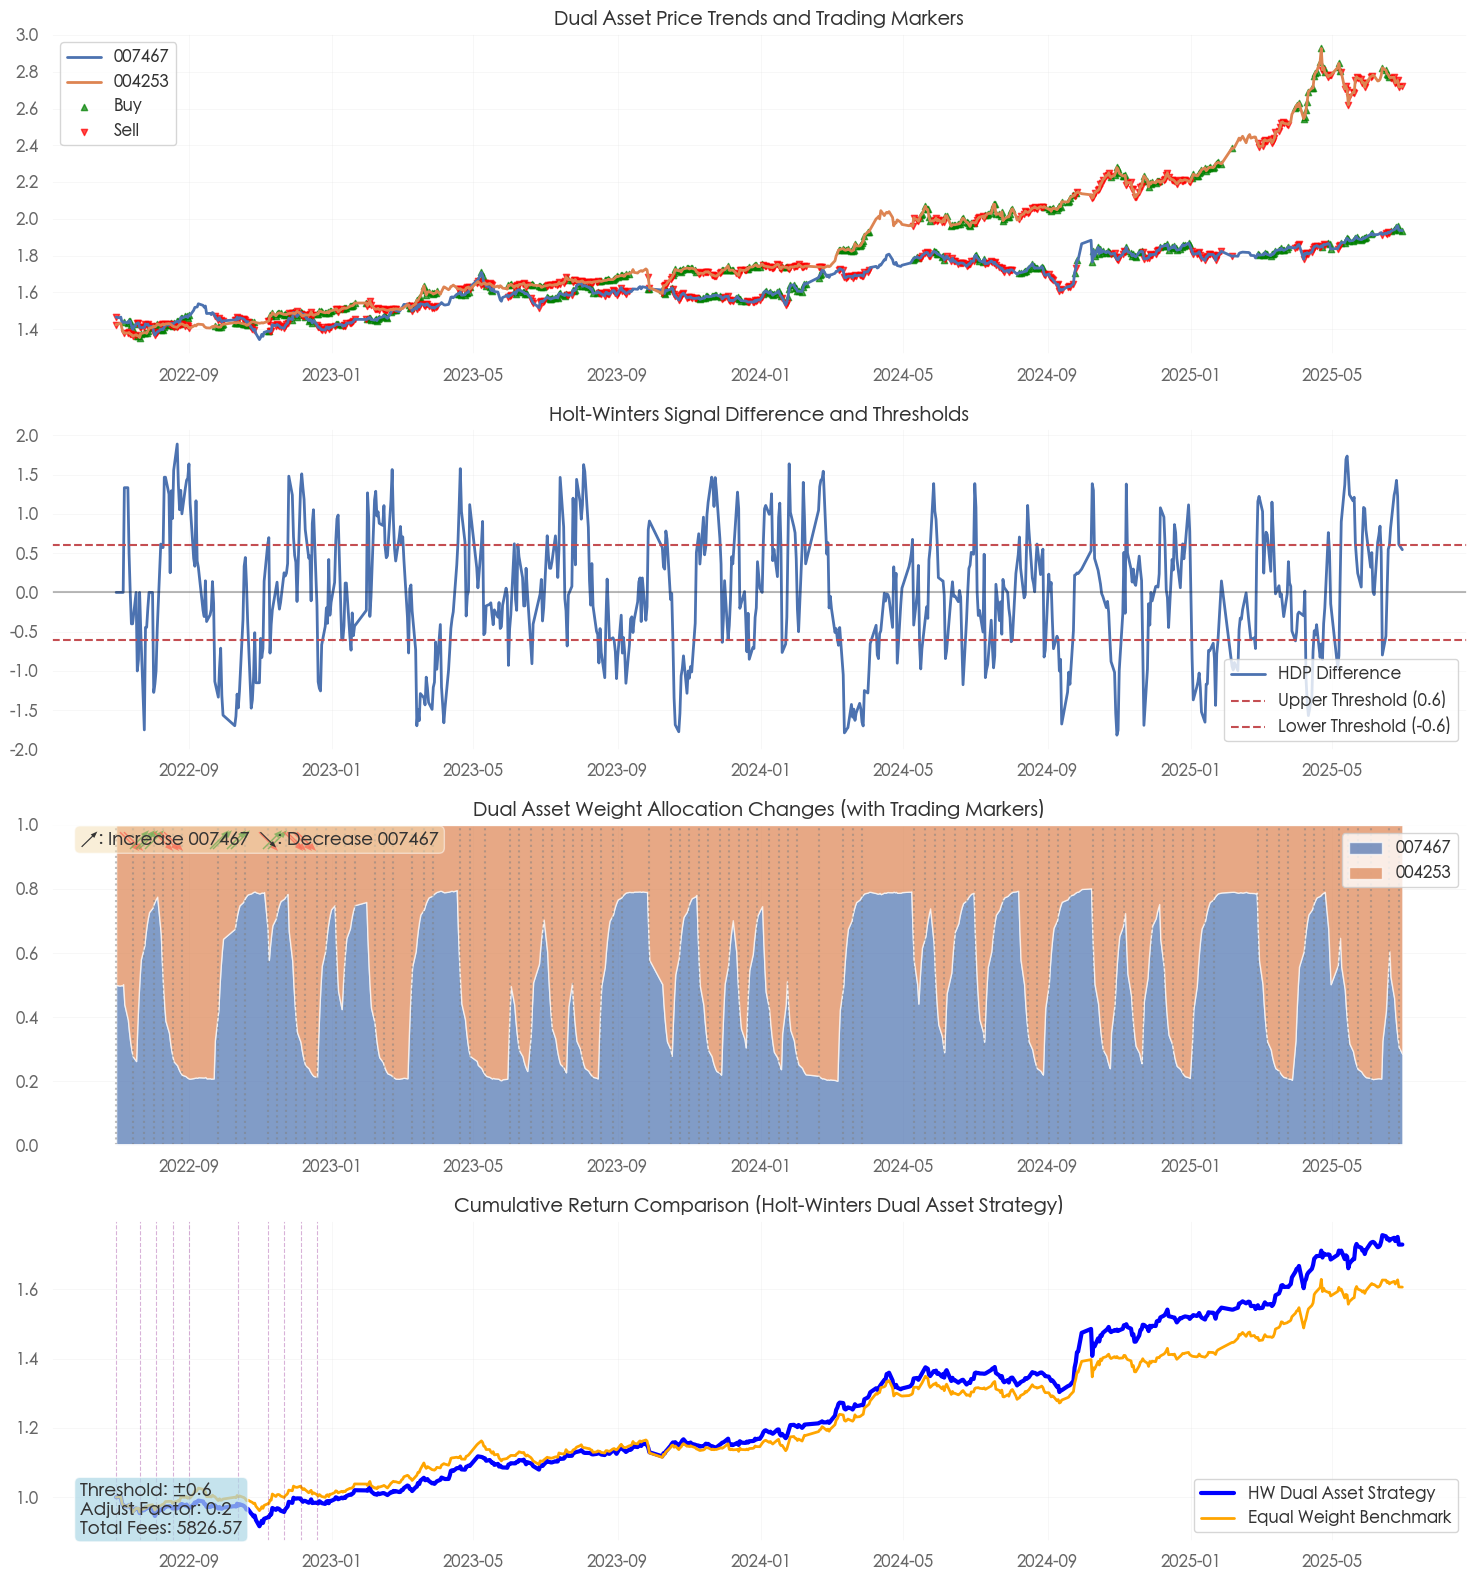


=== Dual Asset HW Strategy Statistics ===
Threshold setting: ±0.6
Weight configuration: Default[0.5 0.5], Up[0.2 0.8], Down[0.8 0.2]
HW optimization: No
Signal distribution: Up 166 days (22.8%), Down 178 days (24.4%), Neutral 385 days (52.8%)
Rebalancing count: 608
Average rebalancing interval: 1.2 days


In [8]:
# 分析结果
stats = strategy.analyze_results(portfolio)

# 绘制结果
strategy.plot_results(portfolio, rebalance_mask)
